In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# 데이터 준비
data = np.loadtxt('./country1.csv', delimiter=',', dtype=np.float64)
print(type(data))
print(data.shape)
print(data[:10])

<class 'numpy.ndarray'>
(100, 7)
[[0.e+00 0.e+00 0.e+00 5.e+00 1.e+00 0.e+00 0.e+00]
 [1.e+00 0.e+00 1.e+00 6.e+00 1.e+00 0.e+00 1.e+00]
 [1.e+00 1.e+00 1.e+00 1.e+01 1.e+00 0.e+00 1.e+00]
 [0.e+00 0.e+00 0.e+00 1.e+01 1.e+00 0.e+00 0.e+00]
 [1.e+00 0.e+00 1.e+00 1.e+01 1.e+00 2.e+03 1.e+00]
 [1.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+03 0.e+00]
 [0.e+00 0.e+00 0.e+00 5.e+00 1.e+00 0.e+00 0.e+00]
 [1.e+00 0.e+00 1.e+00 6.e+00 1.e+00 0.e+00 1.e+00]
 [1.e+00 1.e+00 1.e+00 1.e+01 1.e+00 3.e+03 1.e+00]
 [1.e+00 0.e+00 1.e+00 2.e+00 1.e+00 1.e+03 0.e+00]]


In [3]:
# 평균, 표준 편차의 산출시 행방향 기준이 아니라 열방향을 기준으로 산출해야함.
# 성  명  Python Tensorflow
# 왕눈이  90     80
# 아로미  95     90
# 투투    80     65
# Python 과목의 평균과 표준편차는 열방향으로 구해야하나, 
# 일반적인 관측치 데이터는 행방향을 가지고 있음
print(data.shape)
datat = data.T # 열방향을 행방향으로 변경해야함, 전치 행렬.
# print(datat)
print(datat.shape)
print(datat[0]) # 음주 횟수
print(datat[6]) # class, 분류, 표준화 필요 없음.

(100, 7)
(7, 100)
[ 0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.
  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.  1.
  0.  1.  1.  1.  0.  1. 10.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.
  0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.]
[0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 1.]


In [4]:
print(range(len(datat)))
print(range(len(datat)-1))

# 평균(m) 0, 분산 1, 표준편차: std
def standardize(x):
    return (x - m) / std 

# print(datat)
ms = [] # 평균 목록, 테스트시 사용
stds = [] # 표준편차 목록, 테스트시 사용
for i in range(len(datat)-1):
    # datat[i] = datat[i].astype('float32')
    m = datat[i].mean()
    std = datat[i].std()
    datat[i] = standardize(datat[i]) # 표준화 실행
    print(i, '행 ''m:', m, ' std:', std)
    ms.append(m)
    stds.append(std)
# print(datat) 

range(0, 7)
range(0, 6)
0 행 m: 0.8  std: 1.0295630140987002
1 행 m: 0.39  std: 0.4877499359302879
2 행 m: 0.66  std: 0.4737087712930805
3 행 m: 7.32  std: 2.842111890830479
4 행 m: 0.92  std: 0.2712931993250107
5 행 m: 1190.0  std: 1238.5071659057933


In [5]:
data = datat.T # 행과열을 처음 상태로 복원
print(data.shape)
print(data[0]) 

(100, 7)
[-0.77702869 -0.79959006 -1.39326109 -0.81629439  0.29488391 -0.96083417
  0.        ]


In [6]:
# 훈련용 + 검증용: 90 건
x_train = data[0:90, 0:6] # 변수 6개, 0 ~ 5
print(x_train.shape)
y_train = data[0:90, 6] # class 1개
print(y_train.shape)
# 테스트용: 10 건
x_test =data[90:, 0:6]  # 변수 6개, 0 ~ 5
print(x_test.shape)
y_test =data[90:, 6]    # class 1개
print(y_test.shape)

(90, 6)
(90,)
(10, 6)
(10,)


In [7]:
model = Sequential()
# 최적의 모델
model.add(Dense(30, input_dim=6, activation='relu')) # 입력 값: 17, 출력값: 64
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 가장 작은 오차가 2번 발생하면 학습 자동 중지
early_stopping = EarlyStopping(monitor='loss', patience=2)

# validation_split = 0.2: 20% 검증 데이터로 사용
hist = model.fit(x_train, y_train, validation_split = 0.2, 
                 shuffle=True, epochs=1000, 
                 batch_size=3, callbacks=[early_stopping])


Train on 72 samples, validate on 18 samples
Epoch 1/1000
72/72 [==============================] - 1s 12ms/sample - loss: 0.5487 - accuracy: 0.7222 - val_loss: 0.5020 - val_accuracy: 0.8889
Epoch 2/1000
72/72 [==============================] - 0s 664us/sample - loss: 0.4720 - accuracy: 0.8750 - val_loss: 0.4257 - val_accuracy: 0.9444
Epoch 3/1000
72/72 [==============================] - 0s 653us/sample - loss: 0.4078 - accuracy: 0.9167 - val_loss: 0.3652 - val_accuracy: 0.9444
Epoch 4/1000
72/72 [==============================] - 0s 667us/sample - loss: 0.3517 - accuracy: 0.9306 - val_loss: 0.3105 - val_accuracy: 0.9444
Epoch 5/1000
72/72 [==============================] - 0s 640us/sample - loss: 0.3066 - accuracy: 0.9444 - val_loss: 0.2680 - val_accuracy: 0.9444
Epoch 6/1000
72/72 [==============================] - 0s 639us/sample - loss: 0.2685 - accuracy: 0.9444 - val_loss: 0.2372 - val_accuracy: 0.9444
Epoch 7/1000
72/72 [==============================] - 0s 639us/sample - loss: 0.2

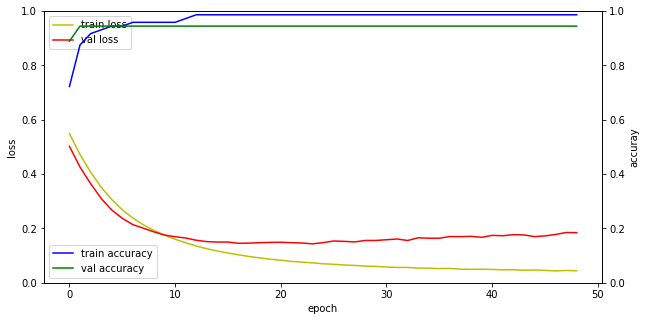

In [8]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 손실
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 손실, 학습의 우수성 평가 척도
loss_ax.set_ylim([0.0, 1.0]) # 왼쪽 y 축, 값을 반영하여 변경

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')   # 훈련 정확도
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y 축, 0 ~100 %를 의미

loss_ax.set_xlabel('epoch')  # x축 레이블
loss_ax.set_ylabel('loss')     # 왼쪽 y 레이블
acc_ax.set_ylabel('accuray') # 오른쪽 y 레이블

loss_ax.legend(loc='upper left')  # 좌측 y 축 기준 범례 위치 설정
acc_ax.legend(loc='lower left')   # 우측 y 축 기준 범례 위치 설정

plt.show()


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.005415612829710881 /정확도: 100.0 %


In [12]:
model.save('Country3.h5')

In [13]:
model = load_model('Country3.h5')

In [14]:
# 1) 주당 음주 횟수: 0 ~ 3(3회 이상)
# 2) 농촌에서 생활적이 있다: 0(없음), 1(있음)
# 3) 가족중에 농촌에서 생활하고 있는 친척있는 여부: 0(없음), 1(있음)
# 4) 1년동안의 여행 횟수: 0 ~ 12
#     (12이상, 교통을 이용한 등산/캠핑, 당일, 국내, 국외 모두 해당)
# 5) 집을 소유 할 수 있는 경제력: 0(없음), 1(있음)
# 6) 경작 할 수 있는 토지 평수: 0 ~ (평)
#     0: 없음, 1: 1 ~ 2000 미만, 2: 2000이상 ~ 3000미만, 3: 3000 이상
# 7) 정착: 1, 실패: 0
        
drink = int(input('주당 음주 횟수는 (0 ~ 3(3회 이상)):'))
life = int(input('농촌에서 생활한 경험(0(없음), 1(있음)):'))
life2 = int(input('가족중에 농촌에서 생활하고 있는 친척있는 여부(0(없음), 1(있음)):'))
trip = int(input('1년동안의 여행 횟수(0 ~ 12):'))
house = int(input('집을 소유 할 수 있는 경제력(0(없음), 1(있음)):'))
land = int(input('경작 할 수 있는 토지 평수(0: 없음, 1: 1 ~ 2000 미만, 2: 2000이상 ~ 3000미만, 3: 3000 이상):'))

주당 음주 횟수는 (0 ~ 3(3회 이상)):2
농촌에서 생활한 경험(0(없음), 1(있음)):1
가족중에 농촌에서 생활하고 있는 친척있는 여부(0(없음), 1(있음)):1
1년동안의 여행 횟수(0 ~ 12):8
집을 소유 할 수 있는 경제력(0(없음), 1(있음)):1
경작 할 수 있는 토지 평수(0: 없음, 1: 1 ~ 2000 미만, 2: 2000이상 ~ 3000미만, 3: 3000 이상):2


#### 표준화를 하여 학습한 경우 모델 이용시에도 표준화를 해서 이용해야함.

In [15]:
data = []
data.append((drink - ms[0]) / stds[0])
data.append((life - ms[1]) / stds[1])
data.append((life2 - ms[2]) / stds[2])
data.append((trip - ms[3]) / stds[3])
data.append((house - ms[4]) / stds[4])
data.append((land - ms[5]) / stds[5])

x = np.array([
             data,
      ])
print(x.shape)
print(x)

(1, 6)
[[2. 1. 1. 8. 1. 2.]]


In [16]:
yp = model.predict(x)
print(yp)
print(yp.shape)

for i in range(len(x)):
    # print('적응 확률:', yp[i][0] * 100, ' %')
    print('적응 확률: {0:.3f}%'.format(yp[i][0] * 100))
    
    if yp[i][0] >= 0.8:
        print('귀농가능합니다.')
    elif yp[i][0] >= 0.5:
        print('귀촌을 권장합니다.')
    else:
        print('귀농/귀촌을 권장하지 않습니다.')


[[0.9999958]]
(1, 1)
적응 확률: 100.000%
귀농가능합니다.
